<a href="https://colab.research.google.com/github/shruthi-jay/ExploratoryDataAnalysis-Airbnb/blob/main/PPDA_SRUTHI_O_T_20352059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AirBNB.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [ ]:
#understanding data
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [ ]:
df.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [ ]:
#finding how much col and rows are there in dataset
df.shape

(74111, 11)

In [ ]:
df.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of              id        room_type  accommodates  ...  bedrooms beds log_price
0       6901257  Entire home/apt           3.0  ...       1.0  1.0  5.010635
1       6304928  Entire home/apt           7.0  ...       3.0  3.0  5.129899
2       7919400  Entire home/apt           5.0  ...       1.0  3.0  4.976734
3      13418779  Entire home/apt           4.0  ...       2.0  2.0  6.620073
4       3808709  Entire home/apt           2.0  ...       0.0  1.0  4.744932
...         ...              ...           ...  ...       ...  ...       ...
74106  14549287     Private room           1.0  ...       1.0  1.0  4.605170
74107  13281809  Entire home/apt           4.0  ...       2.0  4.0  5.043425
74108  18688039  Entire home/apt           5.0  ...       2.0  2.0  5.220356
74109  17045948  Entire home/apt           2.0  ...       0.0  2.0  5.273000
74110   3534845  Entire home/apt           4.0  ...       1.0  2.0  4.852030

[74111 rows x 11 columns]>

In [ ]:
df.nunique()

id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


# Data cleaning

In [ ]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [ ]:
#deleting rows that has null value
df.dropna(subset=['review_scores_rating'],inplace=True)
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
...,...,...,...,...,...,...,...,...,...,...,...
74104,14934112,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74105,808802,Private room,2.0,1.0,moderate,True,f,91.0,1.0,1.0,4.248495
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356


In [ ]:
import pandas as pd
import numpy as np
df=df.dropna()
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
...,...,...,...,...,...,...,...,...,...,...,...
74104,14934112,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74105,808802,Private room,2.0,1.0,moderate,True,f,91.0,1.0,1.0,4.248495
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356


In [ ]:
#checking for outlinear
#checking what all valyes been filled in each columns
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [ ]:
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [ ]:
#checking if there is duplicared value
df.duplicated()

0        False
1        False
2        False
4        False
5        False
         ...  
74104    False
74105    False
74107    False
74108    False
74110    False
Length: 57119, dtype: bool

In [ ]:
df.duplicated().unique()

array([False])

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
#cleaning feee column is not important .lets drop it
df=df.drop(['cleaning_fee'], axis = 1)

In [ ]:
#changing to numerical data
#cancelation policy
df['cancellation_policy']=df['cancellation_policy'].replace({'strict':2,'moderate':1,'flexible':0})
df

,id,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,2,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,2,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,1,t,92.0,1.0,3.0,4.976734
4,3808709,Entire home/apt,2.0,1.0,1,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2.0,1.0,2,t,100.0,1.0,1.0,4.442651
...,...,...,...,...,...,...,...,...,...,...
74104,14934112,Entire home/apt,2.0,1.0,2,f,100.0,1.0,1.0,4.356709
74105,808802,Private room,2.0,1.0,1,f,91.0,1.0,1.0,4.248495
74107,13281809,Entire home/apt,4.0,2.0,1,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,1,t,94.0,2.0,2.0,5.220356


In [ ]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
df['room_type']=df['room_type'].replace({'Entire home/apt':3,'Shared room':2,'Private room':1})
df['instant_bookable']=df['instant_bookable'].replace({'f':0,'t':1})
df

,id,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,3,3.0,1.0,2,0,100.0,1.0,1.0,5.010635
1,6304928,3,7.0,1.0,2,1,93.0,3.0,3.0,5.129899
2,7919400,3,5.0,1.0,1,1,92.0,1.0,3.0,4.976734
4,3808709,3,2.0,1.0,1,1,40.0,0.0,1.0,4.744932
5,12422935,1,2.0,1.0,2,1,100.0,1.0,1.0,4.442651
...,...,...,...,...,...,...,...,...,...,...
74104,14934112,3,2.0,1.0,2,0,100.0,1.0,1.0,4.356709
74105,808802,1,2.0,1.0,1,0,91.0,1.0,1.0,4.248495
74107,13281809,3,4.0,2.0,1,0,93.0,2.0,4.0,5.043425
74108,18688039,3,5.0,1.0,1,1,94.0,2.0,2.0,5.220356


#Relationship Analysis/Visualisation 

In [ ]:
df.corr()

,id,room_type,accommodates,bathrooms,cancellation_policy,instant_bookable,review_scores_rating,bedrooms,beds,log_price
id,1.000000,-0.004175,-0.003980,-0.003385,-0.001686,0.003472,0.000310,-0.007372,-0.007964,-0.009962
room_type,-0.004175,1.000000,0.468816,0.127493,0.166144,-0.027049,0.027051,0.238701,0.361047,0.605117
accommodates,-0.003980,0.468816,1.000000,0.497969,0.202477,0.056151,-0.018003,0.720489,0.824624,0.587382
bathrooms,-0.003385,0.127493,0.497969,1.000000,0.097056,0.002782,0.010571,0.574191,0.512780,0.347883
cancellation_policy,-0.001686,0.166144,0.202477,0.097056,1.000000,0.019981,-0.024071,0.139111,0.178240,0.187403
instant_bookable,0.003472,-0.027049,0.056151,0.002782,0.019981,1.000000,-0.069175,-0.002814,0.058272,-0.050591
review_scores_rating,0.000310,0.027051,-0.018003,0.010571,-0.024071,-0.069175,1.000000,0.010690,-0.027598,0.090510
bedrooms,-0.007372,0.238701,0.720489,0.574191,0.139111,-0.002814,0.010690,1.000000,0.704919,0.489952
beds,-0.007964,0.361047,0.824624,0.512780,0.178240,0.058272,-0.027598,0.704919,1.000000,0.462310
log_price,-0.009962,0.605117,0.587382,0.347883,0.187403,-0.050591,0.090510,0.489952,0.462310,1.000000


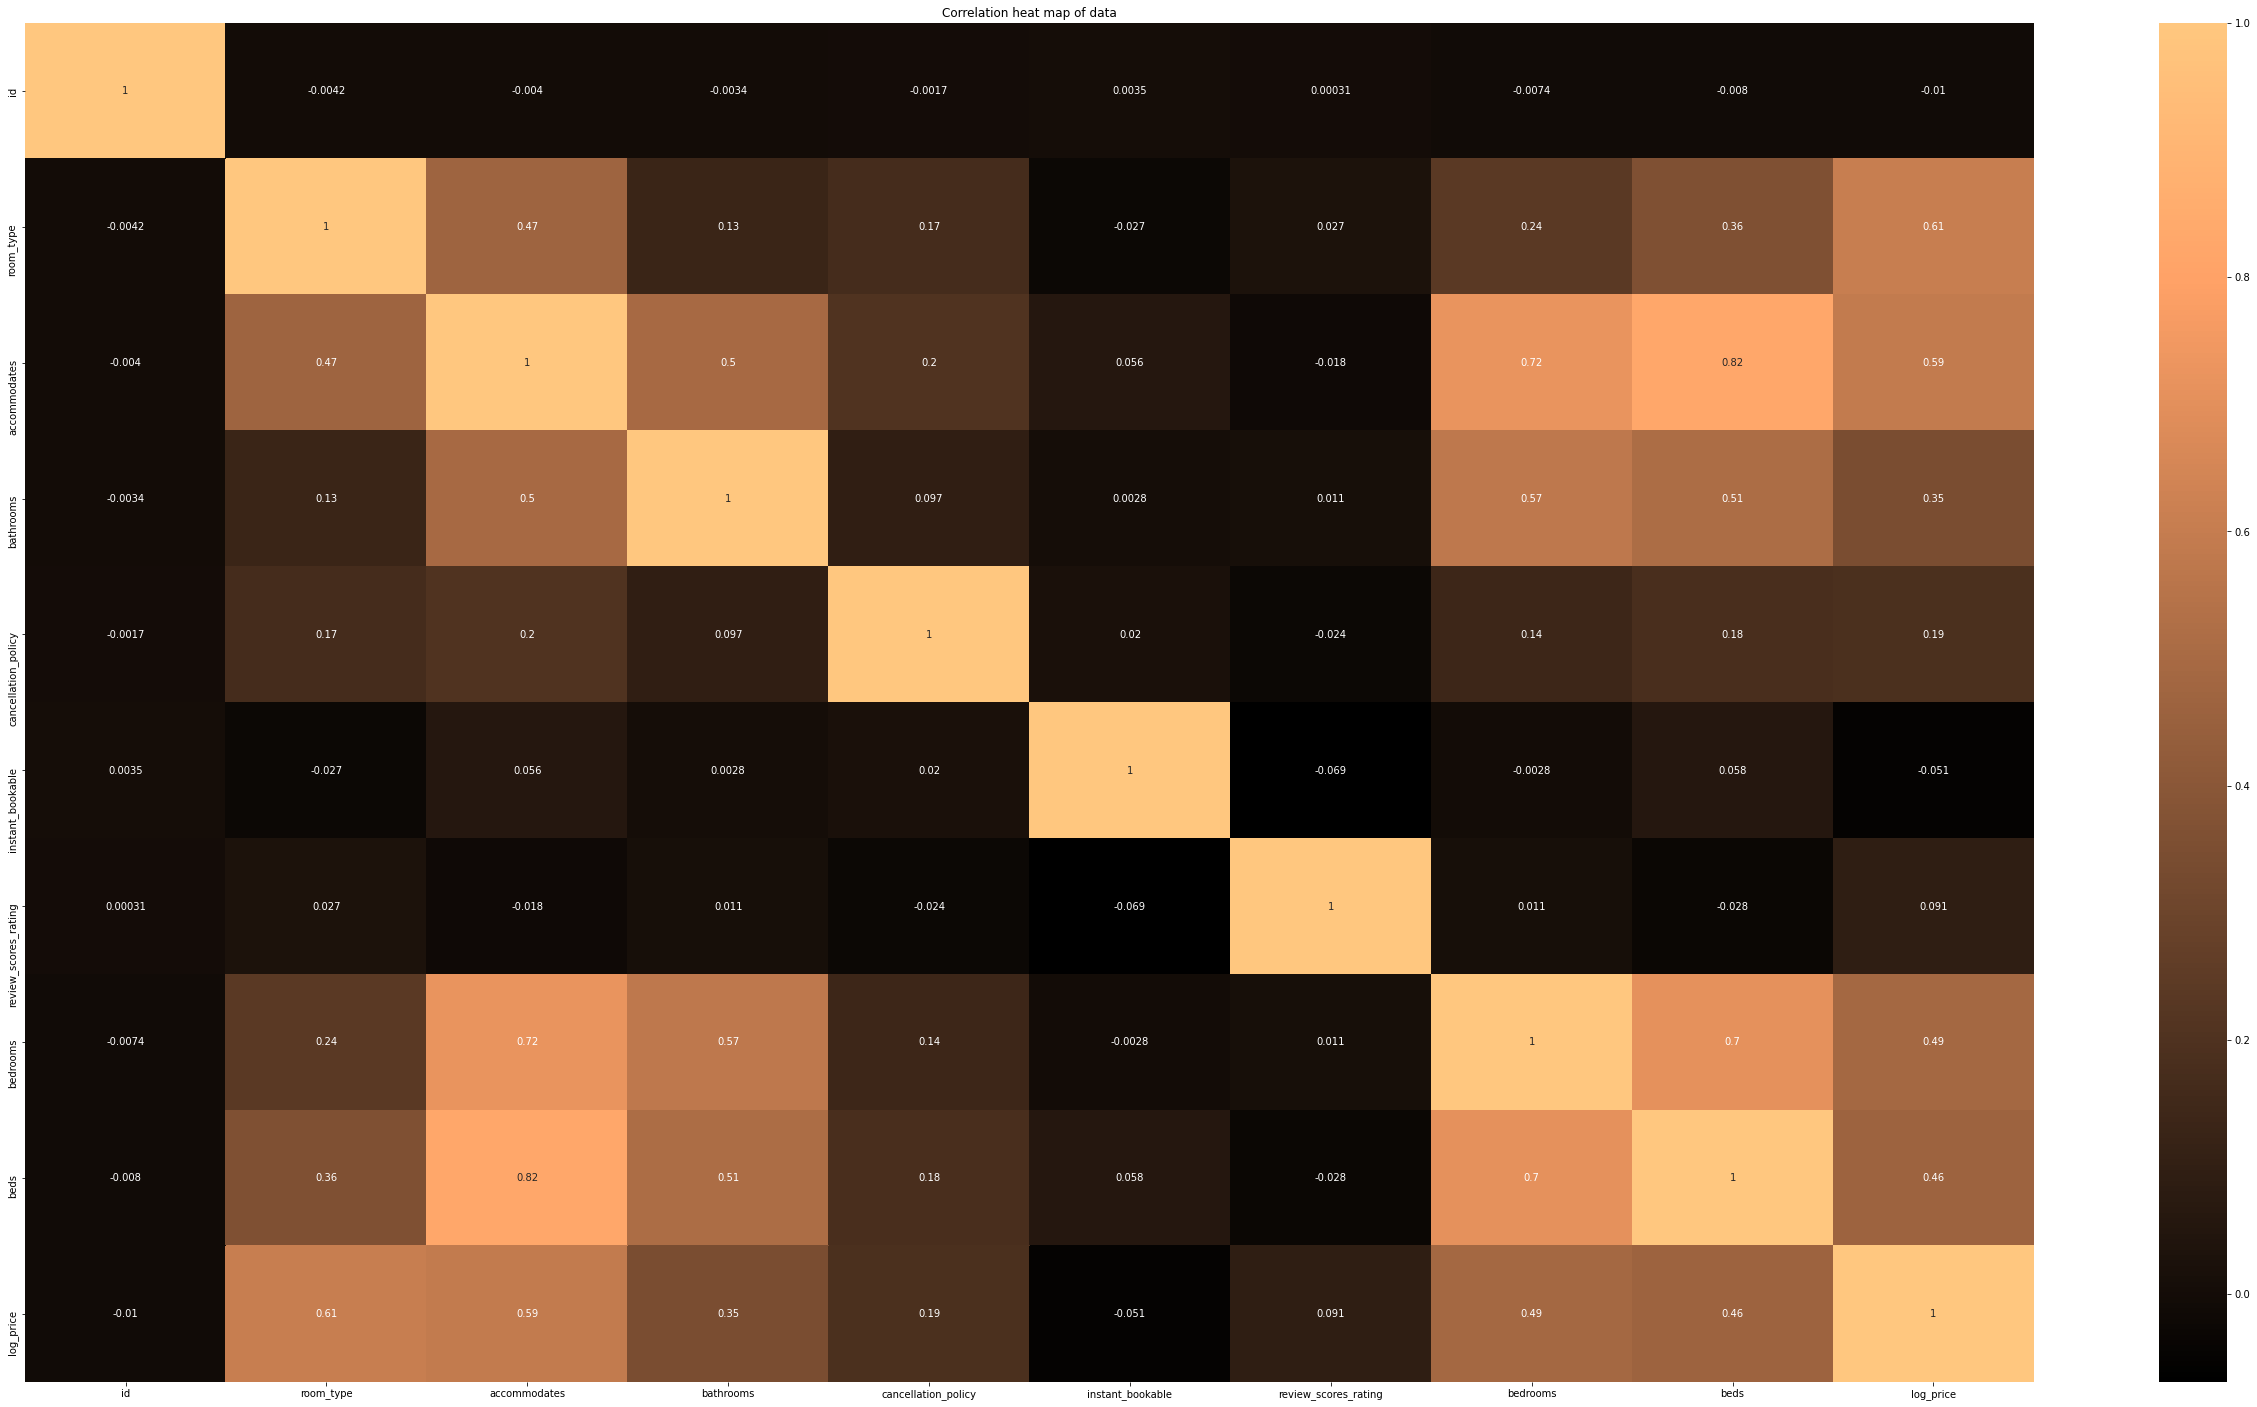

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot = True,cmap='copper')
plt.title('Correlation heat map of data')
plt.rcParams['figure.figsize']=(45,25)
plt.show()

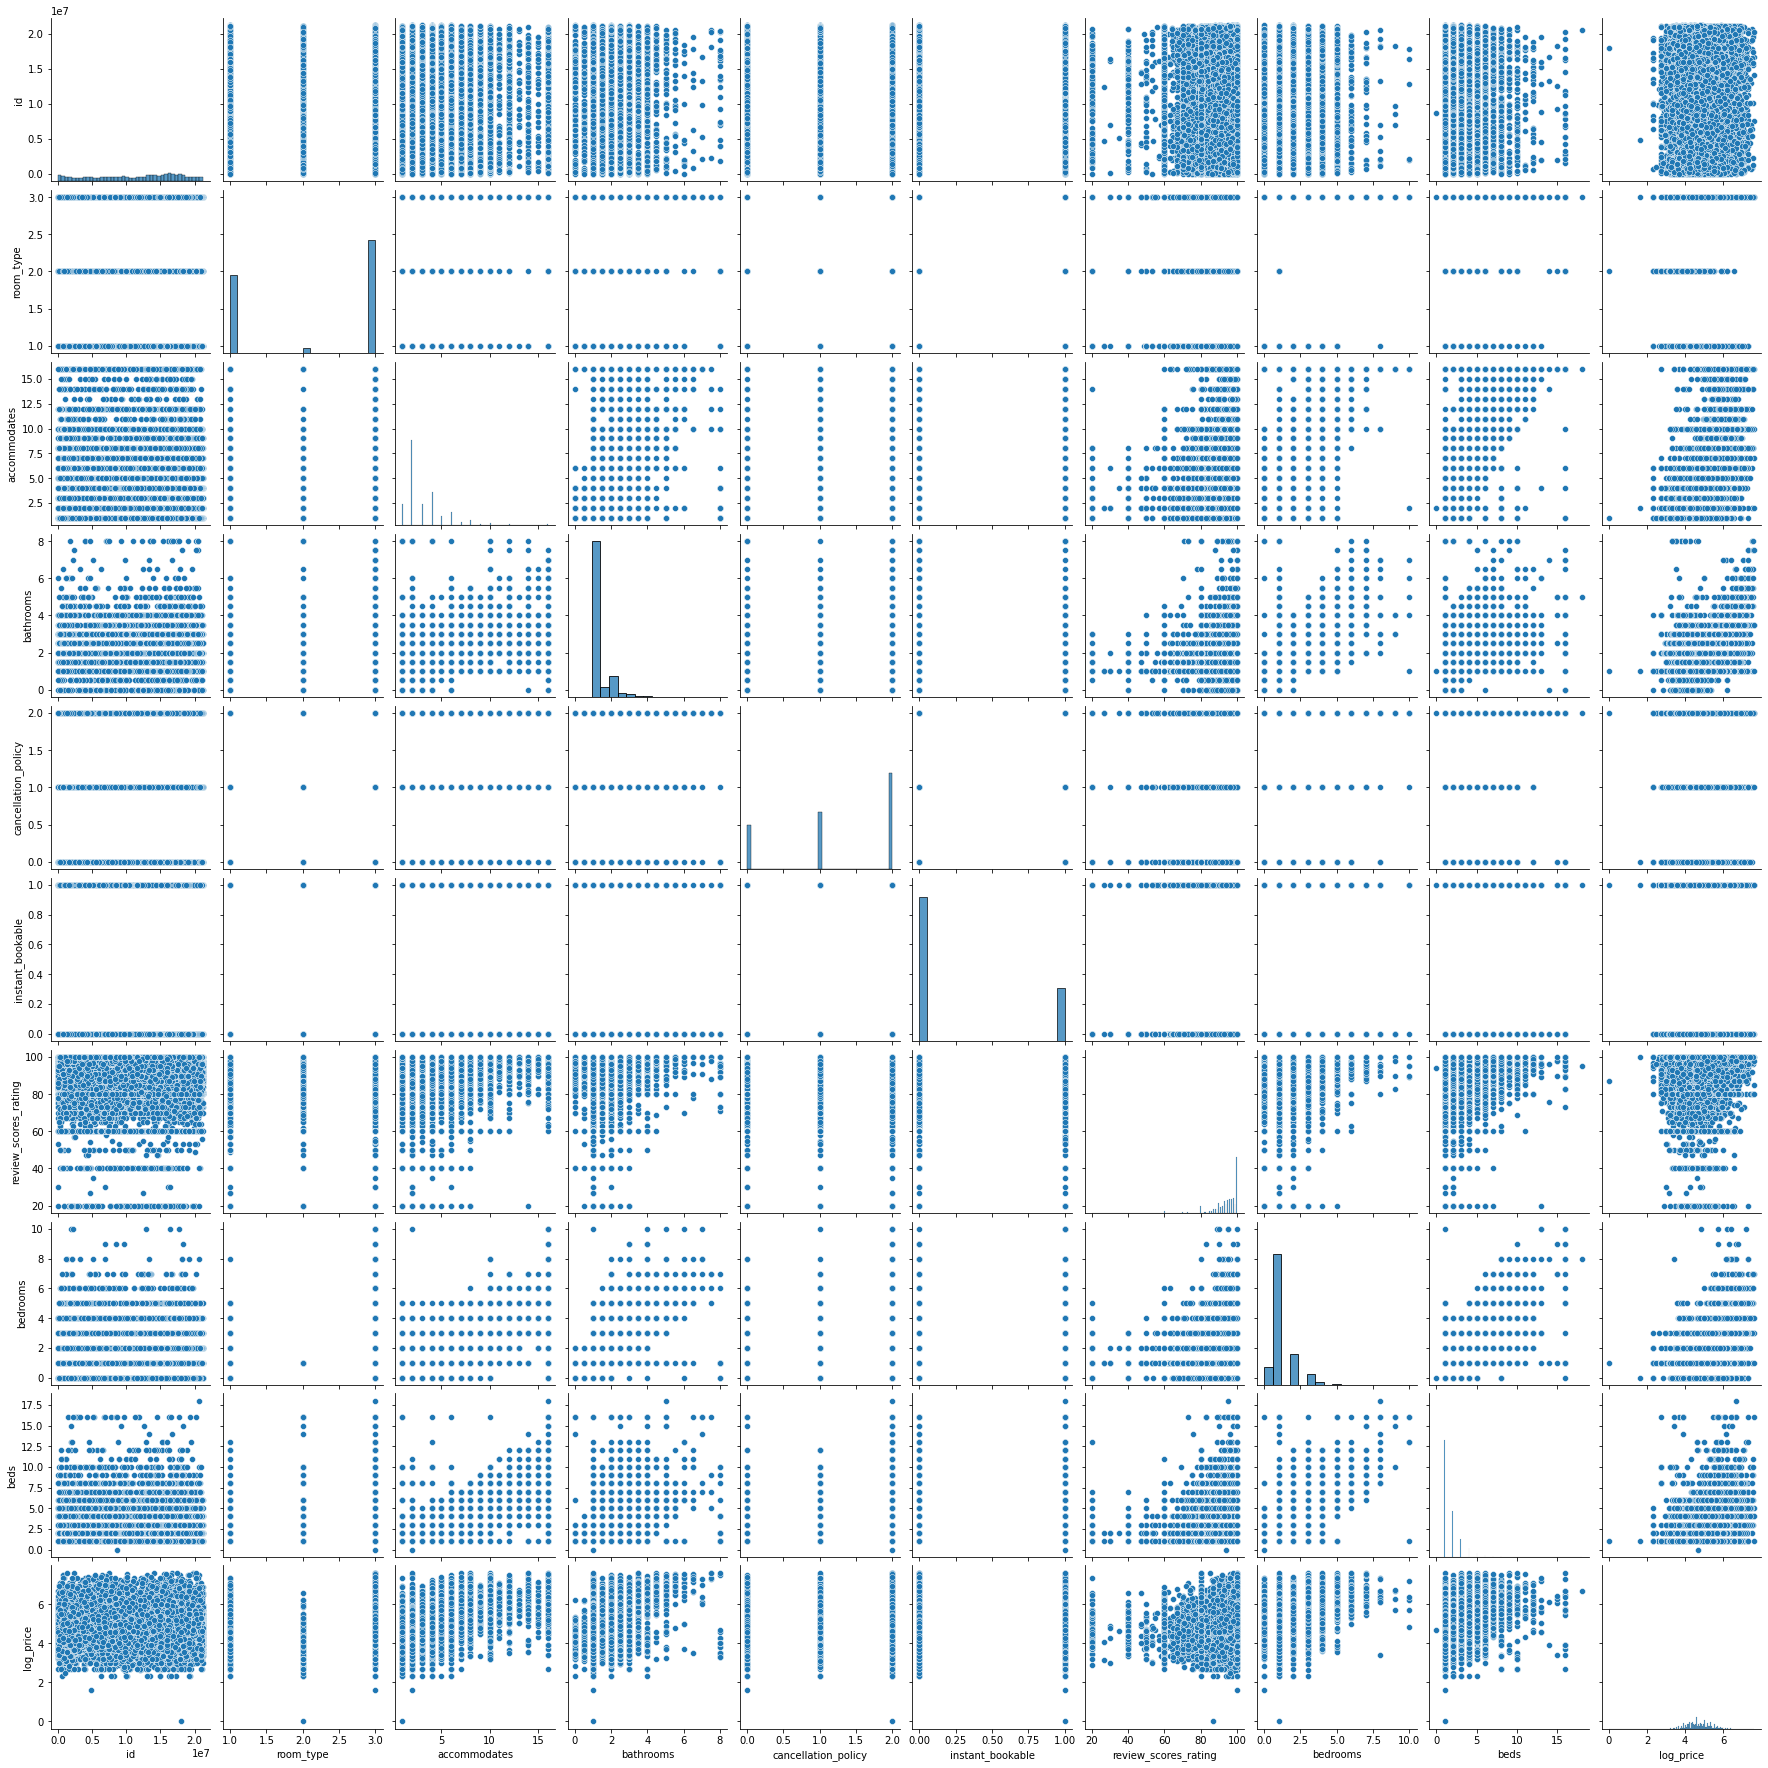

In [ ]:
sns.pairplot(df)

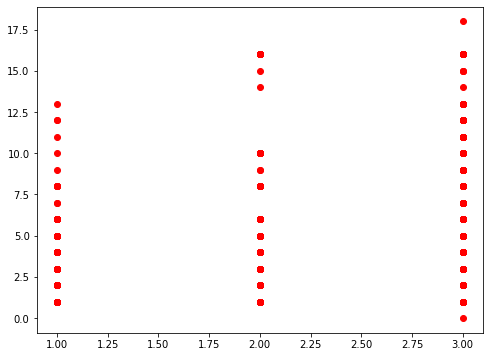

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df.room_type,df.beds,color="red")

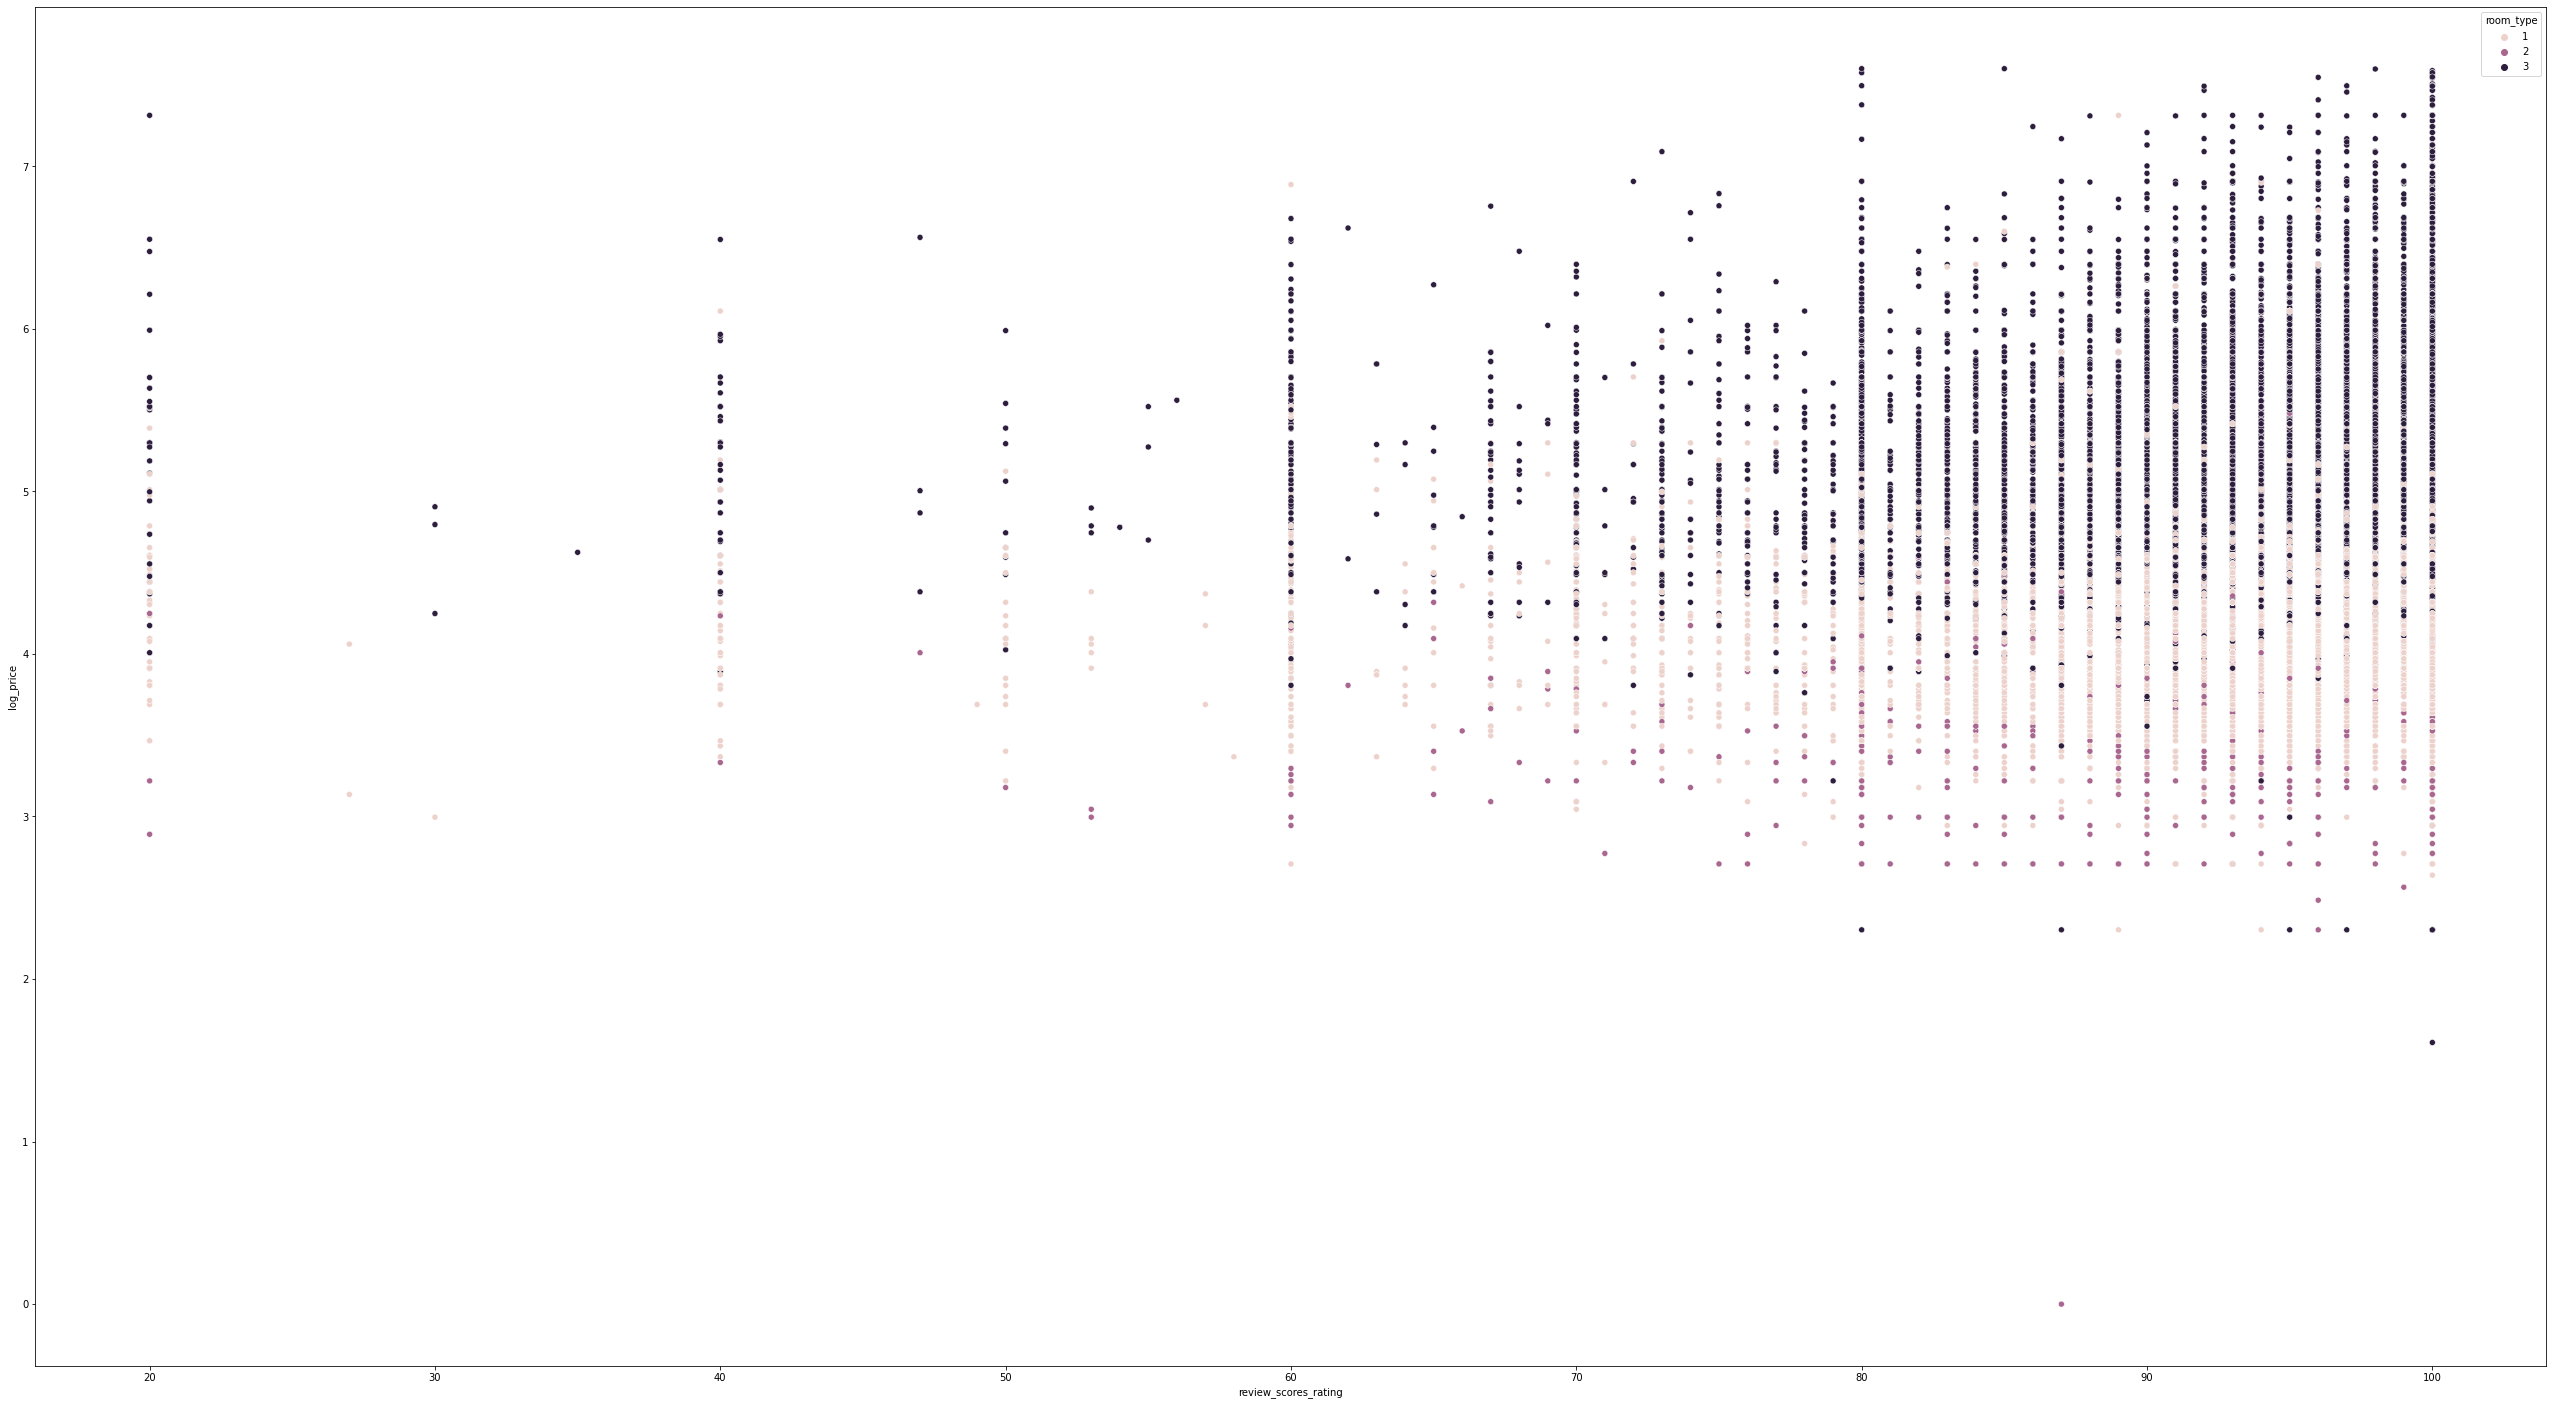

In [ ]:
sns.scatterplot(x=df.review_scores_rating, y=df.log_price,hue=df.room_type);

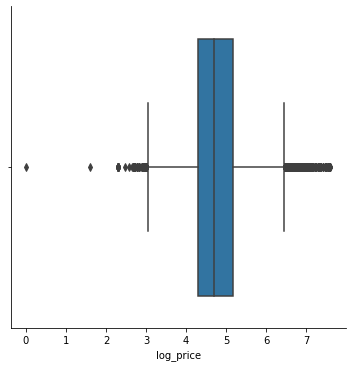

In [ ]:
sns.catplot(x='log_price',kind='box',data=df)

#Linear Regression

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test

array([[2.9422110e+06, 3.0000000e+00, 4.0000000e+00, ..., 9.2000000e+01,
        2.0000000e+00, 2.0000000e+00],
       [1.5483662e+07, 3.0000000e+00, 6.0000000e+00, ..., 1.0000000e+02,
        3.0000000e+00, 3.0000000e+00],
       [1.4967360e+07, 3.0000000e+00, 4.0000000e+00, ..., 9.8000000e+01,
        2.0000000e+00, 2.0000000e+00],
       ...,
       [2.1118725e+07, 1.0000000e+00, 2.0000000e+00, ..., 9.5000000e+01,
        1.0000000e+00, 1.0000000e+00],
       [3.6994000e+05, 1.0000000e+00, 3.0000000e+00, ..., 8.8000000e+01,
        1.0000000e+00, 1.0000000e+00],
       [8.4472990e+06, 1.0000000e+00, 2.0000000e+00, ..., 9.6000000e+01,
        1.0000000e+00, 1.0000000e+00]])

In [ ]:
regressor.predict(X_train)

array([5.20838381, 4.69775736, 4.29897901, ..., 5.1425622 , 4.26369549,
       4.17950821])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([5.19228152, 5.77033496, 5.32793255, ..., 4.23577493, 4.35869661,
       4.24279751])

In [ ]:
regressor.score(X_test,y_test)

0.5236641078686953

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=2)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
y_pred=model.predict(X_test)
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
rmse

0.46256071767843693

In [ ]:
mse=cross_val_score(model,X,y,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(np.abs(mse))
rmse

array([0.4581538 , 0.45940496, 0.46008122])

In [ ]:
bias_error=np.mean(rmse)
var_error=np.std(rmse,ddof=1)
print(bias_error)
print(var_error)

0.45921332873228393
0.00097789642194939


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
 # create regressor object
classifier_random = RandomForestRegressor(n_estimators=100, random_state=0)
classifier_random.fit(X_train, y_train)
classifier_random.score(X_test,y_test)

0.5088350034953969

#KNeighborsRegressor

In [ ]:
from sklearn import neighbors
regressor_knn=neighbors.KNeighborsRegressor(n_neighbors=8)
regressor_knn.fit(X_train, y_train)
regressor_knn.score(X_test,y_test)

-0.12520464518857244